# Geopandas tutorial

Installing geopandas may lead to dependency conflicts. We have prepared an ```environment.yml``` file (a set of instructions for conda to create an environment with specific library versions).

Open a new terminal (MacOS), the Miniforge Prompt (windows), or the terminal at the bottom of your VS Code window. You should start in the base environment.

Navigate to this OxEnergyMScPython local repository folder on your computer using a command along the lines of:
```
cd ~/Documents/GitHub/OxEnergyMScPython
```

Check you are in the correct place with the ```ls``` command. This should list all files and folders within your current working directory. You should see an environment.yml file. 

Create a new environment using this yml file:
```
mamba env create -f environment.yml -n GeoPower
```

Finally, activate your new environment:
```
mamba activate GeoPower
```

In [12]:
import os
os.environ["GDAL_DATA"] = r"C:\Users\laria\miniforge3\envs\GeoPower\Library\share\gdal"


In [13]:
# Import geopandas and matplotlib

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


## Importing data

We are now going to display a map of the world. See this [link](https://geopandas.org/mapping.html) to learn more about this process

There are some built in layers and within geopandas that you might find useful. However, for this exercise, **download the natural earth [low res countries dataset](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/) and import it using the code below.**

You will download the file as a zip. Unzip the file and copy the whole directory to your working directory (or data folder). Remember that shapefiles are a collection of files with a common filename prefix, stored in the same directory. The three mandatory files have filename extensions .shp, .shx, and .dbf. While you should use the filepath of the actual shapefile, specifically to the .shp file, it alone is incomplete for distribution as the other supporting files are required to be present.

For the purposes of this exercise, lets only work with a sub-selection of columns. In the example below, this filtering is done on import using the columns keyword parameter. You may wish to import all columns by removing this, then looking at what columns are included using the ```world.columns``` attribute, and finally indexing on a selction of your choice with ```world = world[["Col A", "Col B", "Col C", etc]]```

In [14]:
# Import the file using the 'read_file' function. The file has cultural features, lets just keep some of them.
world = gpd.read_file("../data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp",
                      columns=["NAME", "NAME_LONG", "ADM0_A3", "POP_EST", "CONTINENT", "REGION_WB",
                               "GDP_MD", "ECONOMY 6.", "INCOME_GRP 4.",
                               "geometry"])

# Notice the column geometry - that is where the map components are stored.
world.head()


,ADM0_A3,CONTINENT,GDP_MD,NAME,NAME_LONG,POP_EST,REGION_WB,geometry
0,FJI,Oceania,5496,Fiji,Fiji,889953.0,East Asia & Pacific,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,TZA,Africa,63177,Tanzania,Tanzania,58005463.0,Sub-Saharan Africa,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,SAH,Africa,907,W. Sahara,Western Sahara,603253.0,Middle East & North Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,North America,1736425,Canada,Canada,37589262.0,North America,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,USA,North America,21433226,United States of America,United States,328239523.0,North America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


<Axes: >

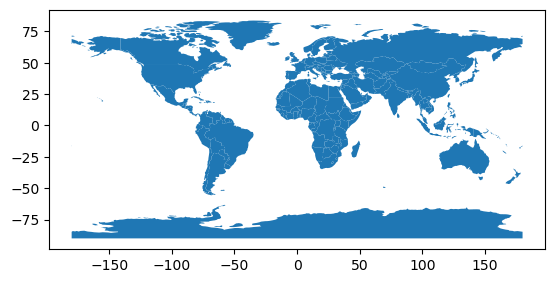

In [15]:
# basic plotting is just as easy as pandas
world.plot()


## Coordinate Reference System
All geodata in the form of shapefiles from reliable sources should have a crs defined. 
If you create your own data, make sure you set the crs before exporting it and sharing using the .set_crs() function.

In [16]:
# You can use a basic command to determine the coordinate reference system.
# For more info, you can look at https://kodu.ut.ee/~kmoch/geopython2018/lessons/L2/projections.html
world.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Activity 1
**1. Calculate the area of each country in $km^{2}$. Print the top 5 countries by area.**

The original CRS is a geographic CRS with angular units, you need to first change the crs to a planar crs - which type is most suitable?

More info can be found in the docs [here](https://geopandas.org/en/stable/docs/user_guide/projections.html).

**2. Create a plot in your new crs - how is this different to before?**

In [18]:
# code here to calculate the area of each country in km^2
# code here to calculate the area of each country in km^2
import geopandas as gpd

world = gpd.read_file(r"C:\Users\laria\Desktop\Oxford 2k25\MSc\Code\OxEnergyMScPython\Geopandas\ne_110m_admin_0_countries.shp")

# Convertir en projection adaptée (Equal Earth)
world_eq = world.to_crs("EPSG:6933")

# Calculer l’aire en km²
world_eq["area_km2"] = world_eq.area / 1e6

# Top 5 par surface
print(world_eq.nlargest(5, "area_km2")[["NAME", "area_km2"]])


                         NAME      area_km2
18                     Russia  1.702059e+07
159                Antarctica  1.233777e+07
3                      Canada  1.003773e+07
4    United States of America  9.509851e+06
139                     China  9.409565e+06


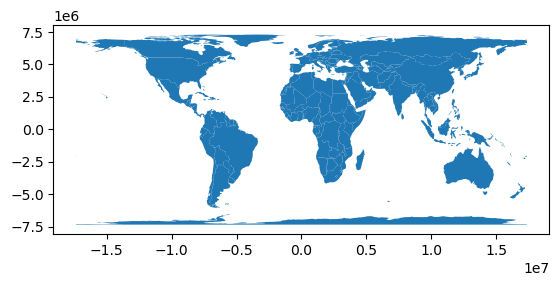

In [19]:
# code here to plot your new crs
world_eq.plot()
plt.show()

## Merging data

Import the dataset of annual renewable electricity generation by country from [OurWorldInData](https://ourworldindata.org/explorers/energy?tab=table&facet=none&country=USA~GBR~CHN~OWID_WRL~IND~BRA~ZAF&hideControls=false&Total+or+Breakdown=Select+a+source&Energy+or+Electricity=Electricity+only&Metric=Annual+generation&Select+a+source=Renewables) using pandas in the code below.

In [20]:
aeg = pd.read_csv("../Data/electricity-renewables.csv")
aeg = aeg[aeg["Year"]==2019]

In [21]:
aeg.head()

,Entity,Code,Year,Electricity from renewables (TWh)
19,ASEAN (Ember),NaN,2019,236.83000
42,Afghanistan,AFG,2019,0.89000
93,Africa,NaN,2019,176.95999
145,Africa (EI),NaN,2019,177.24553
168,Africa (Ember),NaN,2019,176.96000


### Activity 2
**3. Merge you GeoDataFrame with the annual electricity generation dataframe.** <br>
Complete the code which has been started for you below.

In [29]:
# merge data
# Fusionner les deux DataFrames
combined = world.merge(
    aeg,
    how="left",
    left_on="NAME",
    right_on="Entity"
)

combined.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Entity,Code,Year,Electricity from renewables (TWh)
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,FJI,2019.0,0.71
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",Tanzania,TZA,2019.0,3.07
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,2019.0,421.80
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",NaN,NaN,NaN,NaN


## Choropleth
A choropleth map is a type of thematic map where geographic areas (like countries, states, or regions) are colored or shaded according to the values of a statistical variable. The color intensity or pattern represents different ranges of data values, making it easy to visualize spatial patterns and compare values across different areas.

### Activity 3
**4. Calculate a new figure of merit for electricty generation e.g. TWh/person, TWh/GDP, TWh/area.**

**5. Plot a [choropleth](https://geopandas.org/en/stable/docs/user_guide/mapping.html#choropleth-maps) of your renewable electricity figure of merit with a legend.**

In [ ]:
# calculate a new figure of merit

In [ ]:
# plot a choropleth of your figure of merit
fig, ax = plt.subplots(1, 1)
world.plot(column=, ax=ax, legend=True)


### Activitiy 4
***6. Try adding a basemap using the contextily library following [this guide](https://geopandas.org/en/stable/gallery/plotting_basemap_background.html)***

***7. For the 5 highest ranked countries, plot the centroids of the countries and attach labels with with country names.***

In [ ]:
# add a basemap

In [ ]:
# plot the centroids of the 5 highest ranked countries

## Exporting data
Once you've processed and analyzed your geospatial data, you'll often need to save it for future use or sharing with others. GeoPandas makes it easy to export your GeoDataFrames to various geospatial file formats.

Common Export Formats:
- Shapefile (.shp): The most widely used format, compatible with most GIS software
- GeoJSON (.geojson): Web-friendly format, human-readable JSON structure
- GeoPackage (.gpkg): Modern SQLite-based format, supports multiple layers

Best Practices:
Always include the CRS information in your exports (this is done automatically if it has been set for the GeoDataFrame)
Use descriptive filenames and include any relevant metadata
Avoid long column names - shapefiles limit column names to 10 characters. It is often common to include a readme alongside a shapefile that describes the columns and units etc.
Choose the appropriate format for your use case (shapefile for GIS compatibility, GeoJSON for web applications)
Test that your exported file can be read back correctly

***8. Save your geodataframe with new figure of merit. Try both shape file and Geopack to a new shape file.***

In [ ]:
# Save your geodataframe with new figure of merit. Try both shape file and Geopack to a new shape file
# Read https://geopandas.org/io.html#writing-spatial-data

